# Exploración de atributos

En total, hay ochenta columnas en este conjunto de datos, cada una de las cuales corresponde a una entrada en el sistema de registro IDS que tiene la Universidad de *New Brunswick*.

Dado que su sistema de generación de flujos incluye tanto el tráfico saliente como el entrante,
hay columnas para ambos. Las columnas más importantes de este conjunto de datos, según
sus creadores son los siguientes:

• Dst Port: este atributo indica el puerto de destino al que está dirigido el flujo y sus valores están
comprendidos entre el 0 y el 65.535. 

• Protocol: los protocolos capturados en el escenario de red son de comunicación: HTTP y HTTPS,
protcolos de servicio: SSH y FTP y de correo electrónico: SMTP, POP3 e IMAP.

• Flow Duration: este atributo indica la duración del flujo IP. 

• Tot Fwd Pkts: indica la cantidad de paquetes entrantes por cada flujo generado. 

• Tot Bwd Pkts: indica la cantidad de paquetes salientes por cada flujo generado.

### Librerías necesarias

In [1]:
import gc
import pandas as pd
from os import getcwd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 80)

In [2]:
df_from_each_file = []
na_val = ['N/a', 'na', 'Na', 'NA', 'NAN', 'Nan', 'NaN', np.nan]

for file in glob(getcwd() + "/../../Processed Traffic Data for ML Algorithms/*.csv"):
    print(f'Appending {file}')
    read_df = pd.read_csv(file, sep=',', low_memory=False, na_values=na_val)
    if 'Unnamed: 0' in list(read_df.columns):
        read_df.drop(['Unnamed: 0'], axis=1, inplace=True)
    df_from_each_file.append(read_df)

df = pd.concat(df_from_each_file, ignore_index=True)
del(read_df, df_from_each_file)

Appending /home/jovyan/My-Notebooks/Data Exploration/../../Processed Traffic Data for ML Algorithms/New-Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
Appending /home/jovyan/My-Notebooks/Data Exploration/../../Processed Traffic Data for ML Algorithms/New-Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
Appending /home/jovyan/My-Notebooks/Data Exploration/../../Processed Traffic Data for ML Algorithms/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
Appending /home/jovyan/My-Notebooks/Data Exploration/../../Processed Traffic Data for ML Algorithms/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
Appending /home/jovyan/My-Notebooks/Data Exploration/../../Processed Traffic Data for ML Algorithms/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
Appending /home/jovyan/My-Notebooks/Data Exploration/../../Processed Traffic Data for ML Algorithms/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
Appending /home/jovyan/My-Notebooks/Data Exploration/../../Processed Traffic Data for ML Algorith

In [3]:
df = df[['Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Label']]

In [4]:
df.info()
print(f'Size of dataset: {df.shape}.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16232943 entries, 0 to 16232942
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Protocol       int64 
 1   Flow Duration  int64 
 2   Tot Fwd Pkts   int64 
 3   Tot Bwd Pkts   int64 
 4   Label          object
dtypes: int64(4), object(1)
memory usage: 619.2+ MB
Size of dataset: (16232943, 5).


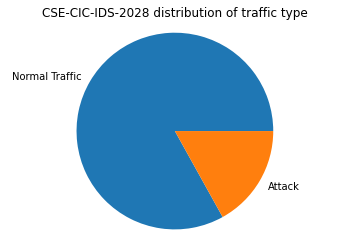

In [8]:
attack_vs_normal.plot(kind='pie')
plt.title('CSE-CIC-IDS-2028 distribution of traffic type')
plt.axis('equal')
plt.ylabel('')
del(attack_vs_normal)

<AxesSubplot:>

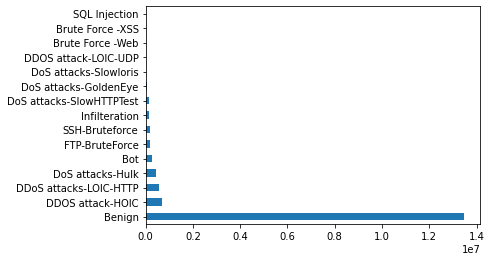

In [9]:
df['Label'].value_counts().plot(kind='barh')

Text(0.5, 1.0, 'Distribution of attack traffic')

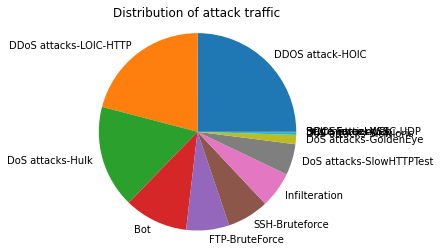

In [10]:
attacks['Label'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.ylabel('')
plt.title('Distribution of attack traffic')

<AxesSubplot:>

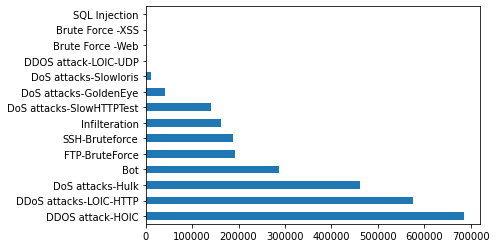

In [11]:
attacks['Label'].value_counts().plot(kind='barh')

## Statistical methods

### Univariate analysis

Univariate analysis looks at the pattern of each individual feature in the data and can be useful when we check outliers and homogeneity of variance. More importantly, univariate analysis can be performed with little effort but it can provide a general sense of the data distribution.

For continuous variables, the univariate analysis consists of common statistics of the distribution, such as the mean, variance, minimum, maximum, median, mode and so on. For categorical variables, we usually use frequency tables, pie charts and bar charts to understand patterns for each category.

### Numerical attributes

The numerical attributes of the following dataset can be summarized in a collection of statistics on each independent network flow. These statistics have already been pre-selected by cybersecurity experts and data engineers from the Communications Security Establishment (CSE) and the Canadian Institute for Cybersecurity (CIC), so that the dataset is as generic as possible and can provide us with all the information we need on the original attacks.

It is to be expected that with such a large number of statistics and parameters, we will find many redundant or highly correlated features in this dataset.

### Categorical values

This dataset shows the enormous amount of numerical attributes versus categorical attributes. The latter being only the label itself and the time stamp. Although looking at it another way, we can see that there are certain numeric attributes that we could treat as categorical for display, such as the destination port or the protocol. 

The analysis of the distribution of the label values (normal, DDoS, Brute-force, Infilteration, etc.) can be found in the previous section, where the distribution of traffic is discussed.

### Protocol Analysis

Text(0.5, 1.0, 'Distribution of protocol in normal traffic')

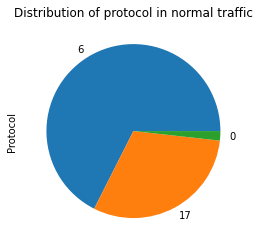

In [49]:
normal_traffic['Protocol'].value_counts().plot(kind='pie')
plt.title('Distribution of protocol in normal traffic')

Text(0.5, 1.0, 'Distribution of protocol in attacks')

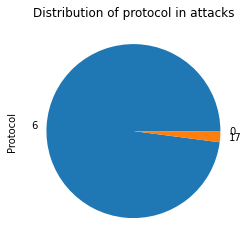

In [50]:
attacks['Protocol'].value_counts().plot(kind='pie')
plt.title('Distribution of protocol in attacks')

In [12]:
attack = attacks[attacks['Label'] == 'DDOS attack-HOIC']

Text(0.5, 1.0, 'Distribution of protocol in DDOS attack-HOIC')

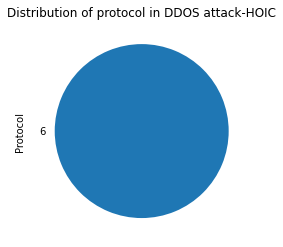

In [13]:
attack['Protocol'].value_counts().plot(kind='pie')
plt.title('Distribution of protocol in DDOS attack-HOIC')

Text(0.5, 1.0, 'Distribution of protocol in DDoS attacks-LOIC-HTTP')

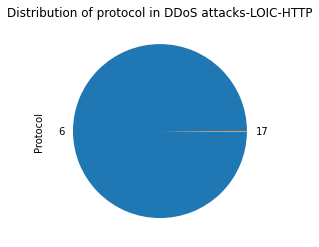

In [14]:
attack = attacks[attacks['Label'] == 'DDoS attacks-LOIC-HTTP']
attack['Protocol'].value_counts().plot(kind='pie')
plt.title('Distribution of protocol in DDoS attacks-LOIC-HTTP')

Text(0.5, 1.0, 'Distribution of protocol in DoS attacks-Hulk')

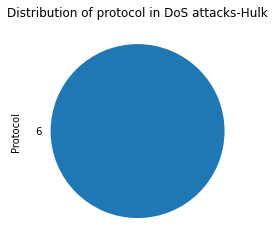

In [15]:
attack = attacks[attacks['Label'] == 'DoS attacks-Hulk']
attack['Protocol'].value_counts().plot(kind='pie')
plt.title('Distribution of protocol in DoS attacks-Hulk')

Text(0.5, 1.0, 'Distribution of protocol in Bot')

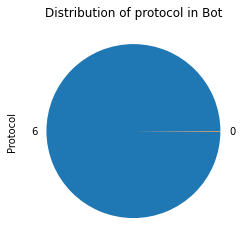

In [16]:
attack = attacks[attacks['Label'] == 'Bot']
attack['Protocol'].value_counts().plot(kind='pie')
plt.title('Distribution of protocol in Bot')

Text(0.5, 1.0, 'Distribution of protocol in FTP-Bruteforce')

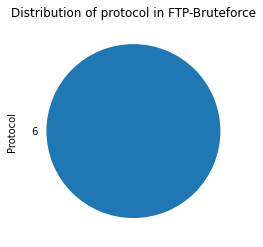

In [17]:
attack = attacks[attacks['Label'] == 'FTP-BruteForce']
attack['Protocol'].value_counts().plot(kind='pie')
plt.title('Distribution of protocol in FTP-Bruteforce')

Text(0.5, 1.0, 'Distribution of protocol in SSH-Bruteforce')

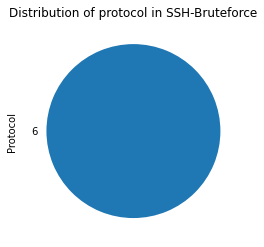

In [18]:
attack = attacks[attacks['Label'] == 'SSH-Bruteforce']
attack['Protocol'].value_counts().plot(kind='pie')
plt.title('Distribution of protocol in SSH-Bruteforce')

Text(0.5, 1.0, 'Distribution of protocol in Infilteration')

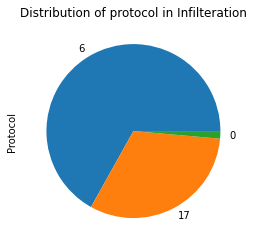

In [19]:
attack = attacks[attacks['Label'] == 'Infilteration']
attack['Protocol'].value_counts().plot(kind='pie')
plt.title('Distribution of protocol in Infilteration')

Text(0.5, 1.0, 'Distribution of protocol in DoS attacks-SlowHTTPTest')

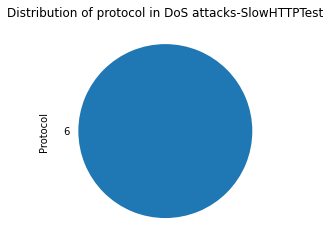

In [20]:
attack = attacks[attacks['Label'] == 'DoS attacks-SlowHTTPTest']
attack['Protocol'].value_counts().plot(kind='pie')
plt.title('Distribution of protocol in DoS attacks-SlowHTTPTest')

Text(0.5, 1.0, 'Distribution of protocol in DoS attacks-GoldenEye')

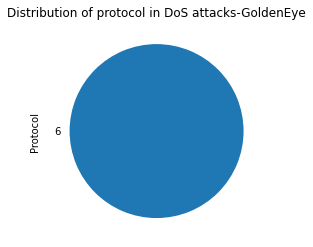

In [21]:
attack = attacks[attacks['Label'] == 'DoS attacks-GoldenEye']
attack['Protocol'].value_counts().plot(kind='pie')
plt.title('Distribution of protocol in DoS attacks-GoldenEye')

Text(0.5, 1.0, 'Distribution of protocol in DoS attacks-Slowloris')

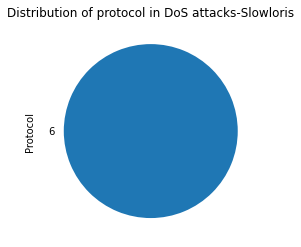

In [22]:
attack = attacks[attacks['Label'] == 'DoS attacks-Slowloris']
attack['Protocol'].value_counts().plot(kind='pie')
plt.title('Distribution of protocol in DoS attacks-Slowloris')

Text(0.5, 1.0, 'Distribution of protocol in DDOS attack-LOIC-UDP')

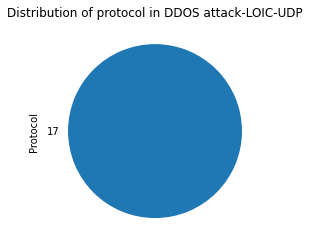

In [23]:
attack = attacks[attacks['Label'] == 'DDOS attack-LOIC-UDP']
attack['Protocol'].value_counts().plot(kind='pie')
plt.title('Distribution of protocol in DDOS attack-LOIC-UDP')

Text(0.5, 1.0, 'Distribution of protocol in Brute Force -Web')

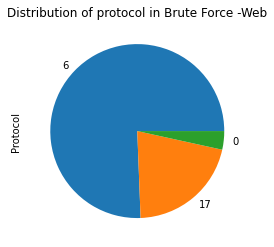

In [24]:
attack = attacks[attacks['Label'] == 'Brute Force -Web']
attack['Protocol'].value_counts().plot(kind='pie')
plt.title('Distribution of protocol in Brute Force -Web')

Text(0.5, 1.0, 'Distribution of protocol in Brute Force -XSS')

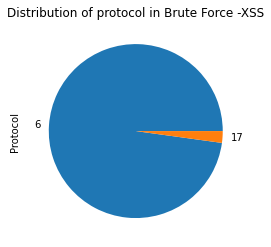

In [25]:
attack = attacks[attacks['Label'] == 'Brute Force -XSS']
attack['Protocol'].value_counts().plot(kind='pie')
plt.title('Distribution of protocol in Brute Force -XSS')

Text(0.5, 1.0, 'Distribution of protocol in SQL Injection')

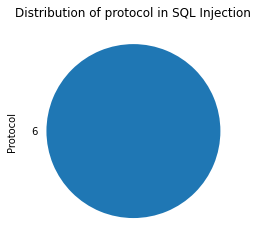

In [26]:
attack = attacks[attacks['Label'] == 'SQL Injection']
attack['Protocol'].value_counts().plot(kind='pie')
plt.title('Distribution of protocol in SQL Injection')

### Flow Duration

Text(0.5, 1.0, 'Distribution of Flow Duration values')

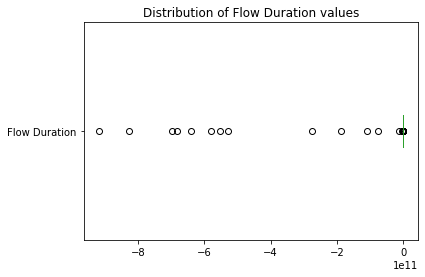

In [27]:
df['Flow Duration'].plot(kind='box', vert=False)
plt.title('Distribution of Flow Duration values')

Text(0.5, 1.0, 'Distribution of Flow Duration values in normal traffic')

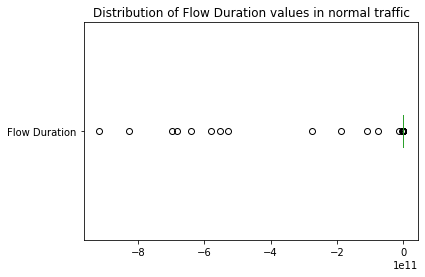

In [48]:
normal_traffic[['Flow Duration']].plot(kind='box', vert=False)
plt.title('Distribution of Flow Duration values in normal traffic')

Text(0.5, 1.0, 'Distribution of Flow Duration values in attacks')

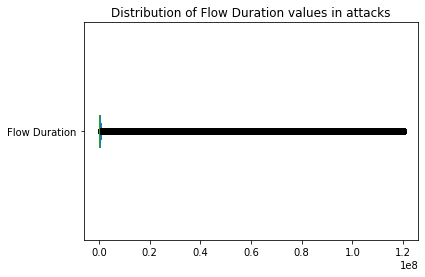

In [51]:
attacks[['Flow Duration']].plot(kind='box', vert=False)
plt.title('Distribution of Flow Duration values in attacks')

Text(0.5, 1.0, 'Distribution of Flow Duration by Attack Type')

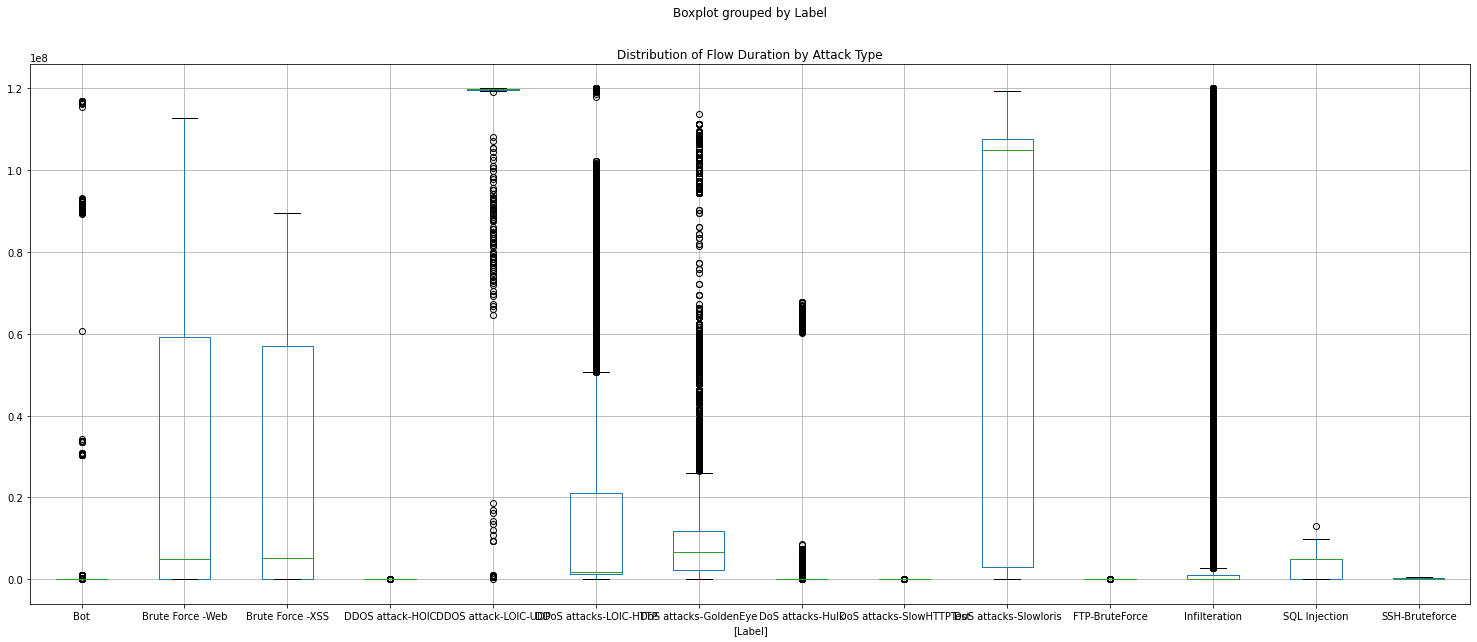

In [33]:
attacks[['Flow Duration', 'Label']].boxplot(by='Label', figsize=(25,10))
plt.title('Distribution of Flow Duration by Attack Type')

### Tot Fwd Pkts

Text(0.5, 1.0, 'Distribution of Tot Fwd Pkts values')

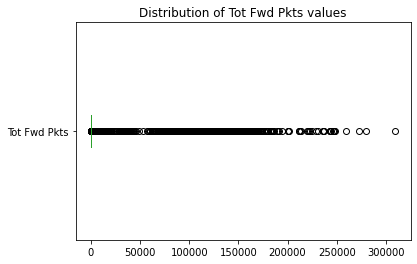

In [34]:
df['Tot Fwd Pkts'].plot(kind='box', vert=False)
plt.title('Distribution of Tot Fwd Pkts values')

Text(0.5, 1.0, 'Distribution of Tot Fwd Pkts values in normal traffic')

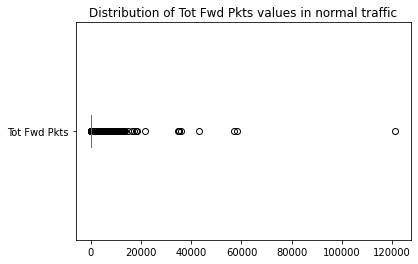

In [47]:
normal_traffic['Tot Fwd Pkts'].plot(kind='box', vert=False)
plt.title('Distribution of Tot Fwd Pkts values in normal traffic')

Text(0.5, 1.0, 'Distribution of Tot Fwd Pkts values in attacks')

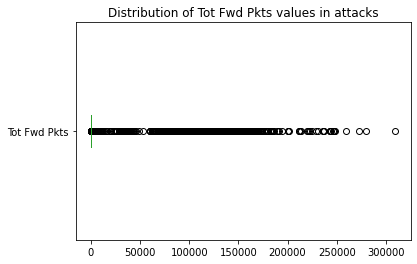

In [53]:
attacks[['Tot Fwd Pkts']].plot(kind='box', vert=False)
plt.title('Distribution of Tot Fwd Pkts values in attacks')

Text(0.5, 1.0, 'Distribution of Tot Fwd Pkts by Attack Type')

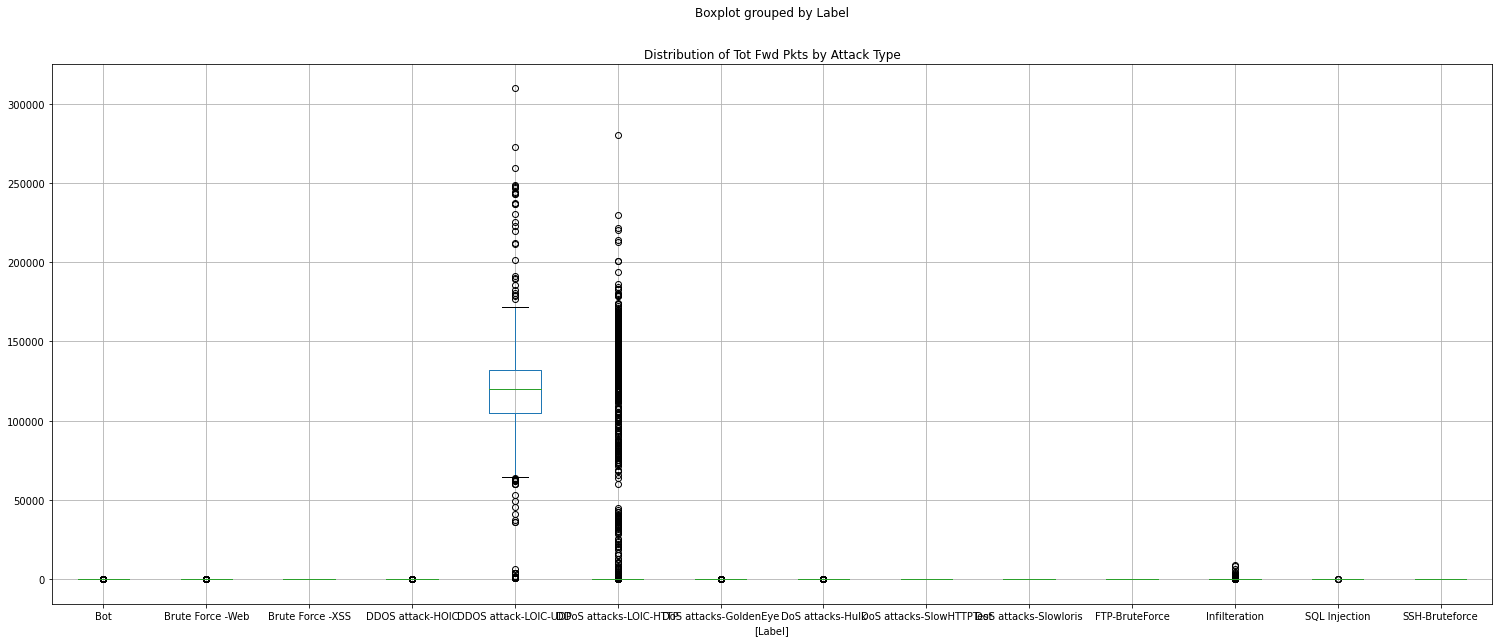

In [36]:
attacks[['Tot Fwd Pkts', 'Label']].boxplot(by='Label', figsize=(25,10))
plt.title('Distribution of Tot Fwd Pkts by Attack Type')

### Tot Bwd Pkts

Text(0.5, 1.0, 'Distribution of Tot Bwd Pkts values')

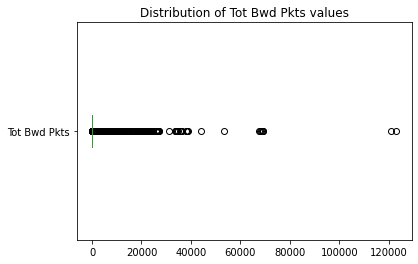

In [37]:
df['Tot Bwd Pkts'].plot(kind='box', vert=False)
plt.title('Distribution of Tot Bwd Pkts values')

Text(0.5, 1.0, 'Distribution of Tot Bwd Pkts values in normal traffic')

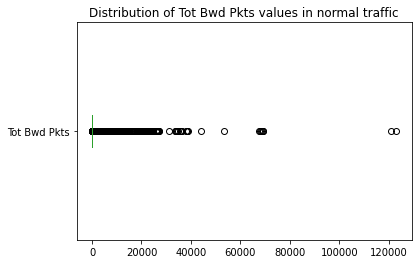

In [46]:
normal_traffic['Tot Bwd Pkts'].plot(kind='box', vert=False)
plt.title('Distribution of Tot Bwd Pkts values in normal traffic')

Text(0.5, 1.0, 'Distribution of Tot Bwd Pkts values in attacks')

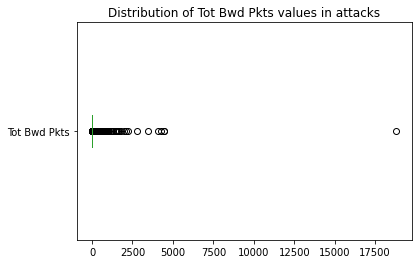

In [54]:
attacks[['Tot Bwd Pkts']].plot(kind='box', vert=False)
plt.title('Distribution of Tot Bwd Pkts values in attacks')

Text(0.5, 1.0, 'Distribution of Tot Bwd Pkts by Attack Type')

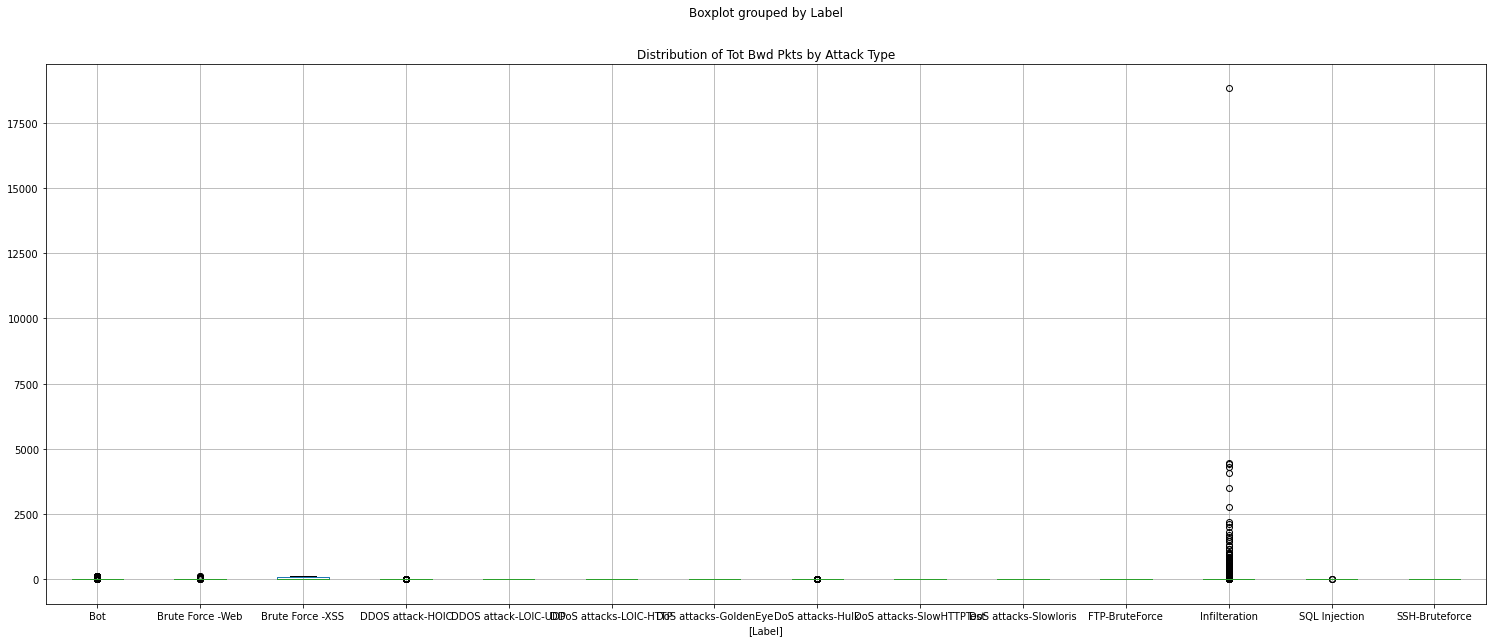

In [39]:
attacks[['Tot Bwd Pkts', 'Label']].boxplot(by='Label', figsize=(25,10))
plt.title('Distribution of Tot Bwd Pkts by Attack Type')